# Part II - (Prosper Loan Data Analysis)
## by (Lerato Maluleke)

## Investigation Overview


> The investigations will look at variables which answer the question with visualisations:
- What effects the borrowers APR or interest rate in prosper loan ?
- Which variables affects the loan outcome which include Loan Term that determining the outcome of a loan? 

## Dataset Overview

>The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
ploan = pd.read_csv('prosperLoanData.csv')
# Subset the dataframe
cols = ['LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'StatedMonthlyIncome',
        'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)']
loan_subset = ploan[cols]

# group all values in "LoanStatus" containing "Past Due " and replace with "Past Due"
loan_subset.loc[loan_subset['LoanStatus'].str.contains('Past Due '), 'LoanStatus'] = 'Past Due'
loan_subset[loan_subset['LoanStatus']=="Past Due"]

# set dtype of 'LoanStatus' to category
loanstatus_order = loan_subset['LoanStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = loanstatus_order)
loan_subset['LoanStatus'] = loan_subset['LoanStatus'].astype(ordered_var)

# set dtype of 'EmploymentStatus' to category
employ_order = loan_subset['EmploymentStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = employ_order)
loan_subset['EmploymentStatus'] = loan_subset['EmploymentStatus'].astype(ordered_var)

# set dtype of 'Term' to category
term_order = [12, 36, 60]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = term_order)
loan_subset['Term'] = loan_subset['Term'].astype(ordered_var)

# set dtype of 'rating' to category
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_var = pd.api.types.CategoricalDtype(categories = rating_order, ordered = True)
loan_subset['ProsperRating (Alpha)'] = loan_subset['ProsperRating (Alpha)'].astype(ordered_var)

loan_subset.shape

(113937, 9)

### Distribution  of Borrower APR 

The distribution seems like its multomodal with a small peaks of o.1 and a bigger one at 0.2. Then it declines the has a peak of 0.3 then a sudden spike at 0.35. Then a decrease of loans above 0.42

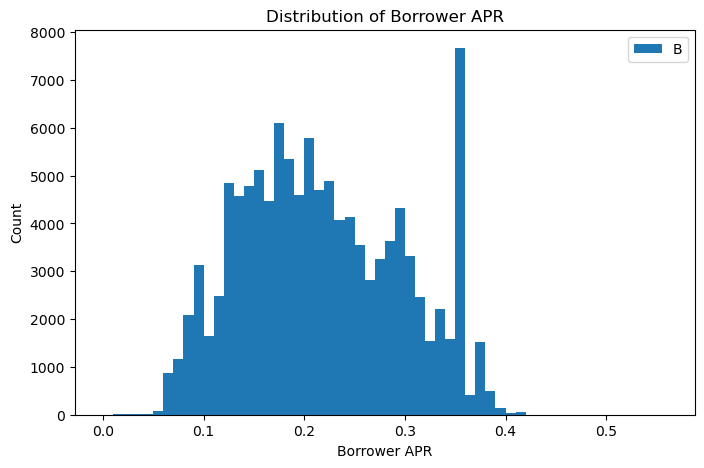

In [5]:
bins = np.arange(0, ploan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = ploan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Count');
plt.title('Distribution of Borrower APR');
plt.legend('Borrower APR');

### Loan original amount vs Borrower APR

 

At different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR decrease with increase of loan amount

## Debt to income ratio visualisation 



The distribution of stated monthly income is severely right screwed, with most of stated monthly income less than 30k.

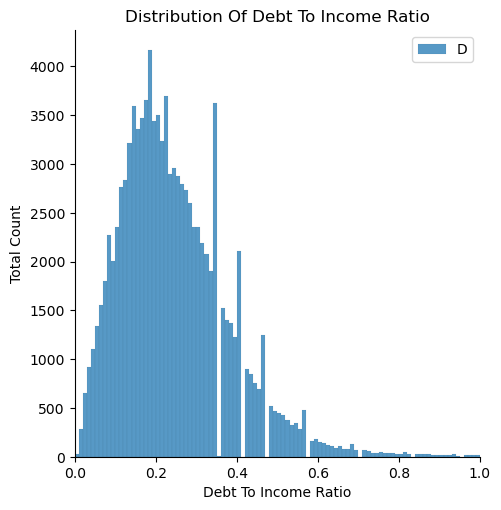

In [6]:
# The distribution where DebttoIncomeRatio <=1
bin_edges = np.arange(0, loan_subset.DebtToIncomeRatio.max() + 0.01, 0.01)
sb.displot(loan_subset.DebtToIncomeRatio, kde = False, bins = bin_edges)
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Total Count')
plt.title('Distribution Of Debt To Income Ratio')
plt.xlim((0, 1))
plt.grid(False);
plt.legend('Debt to income')

Employment and other variables 

Does a Term affecct the chance of getting a loan when one is employed?

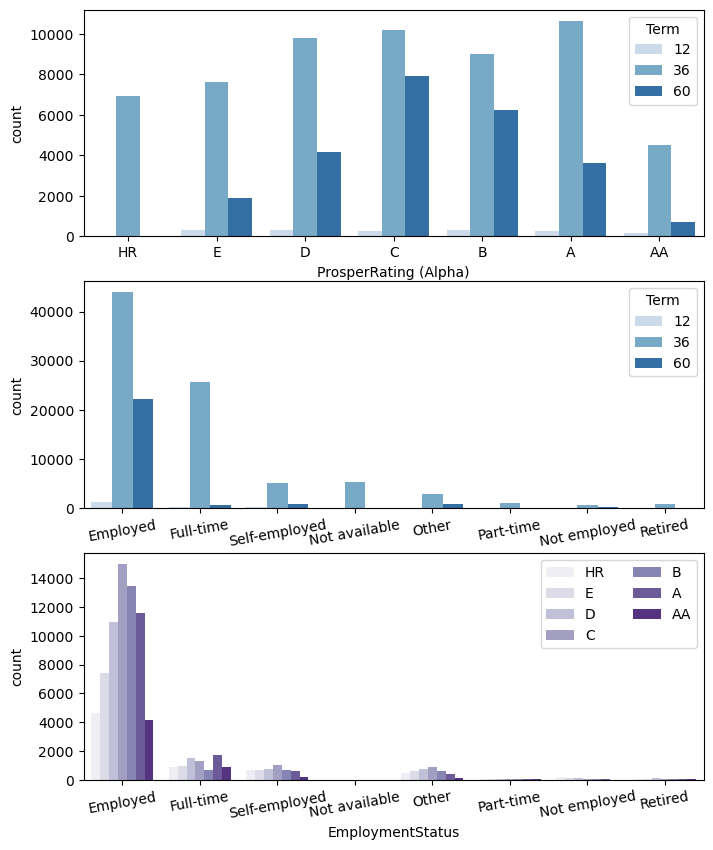

In [7]:
plt.figure(figsize = [8, 10])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sb.countplot(data = loan_subset, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_subset, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_subset, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Purples')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

In the first graph employed customers status is showing in all the terms, showing the highest.In term for 36 months employed customers are the highest followed by full-time employment.The 60 months employment is still showing the highest this could mean when one is employed there is a greater chance of getting a loan dispite the term of the loan.

The next graph also shows employment in across all the prosper rating, especially C,B,A and D.

In [ ]:
!jupyter nbconvert Part_II_slide.ipynb --to slides --post serve --no-input --no-prompt

In [ ]:
Thank you for your time. 